<a href="https://colab.research.google.com/github/imdressel/project_gss17/blob/main/GSS_Isabella's_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Comparing marital status and meovrwrk

In [1]:
! git clone https://github.com/imdressel/project_gss17/

Cloning into 'project_gss17'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 138 (delta 38), reused 24 (delta 22), pack-reused 91
Receiving objects: 100% (138/138), 25.51 MiB | 21.89 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('./project_gss17/gss_data_20182022.csv')
df2018 = df[df['year'] == 2018].copy() # to avoid warnings
df2022 = df[df['year'] == 2022].copy()

# clean variables as needed
meovrwrk = df['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
df['meovrwrk'] = meovrwrk
marital = df['marital']
marital = marital.astype("string")
df['marital'] = marital

del marital
del meovrwrk

In [28]:
# 2018
meovrwrk = df2018['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
df2018['meovrwrk'] = meovrwrk
marital = df2018['marital']
marital = marital.astype("string")
df2018['marital'] = marital

del marital
del meovrwrk

In [29]:
# 2022
meovrwrk = df2022['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
df2022['meovrwrk'] = meovrwrk
marital = df2022['marital']
marital = marital.astype("string")
df2022['marital'] = marital

## Use grouped stacked histplots to look at relationship between marital status and meovrwrk

In [10]:
df.head()

,year,id,marital,hrs1,conrinc,childs,meovrwrk,hlthdep
0,2018.0,1,never married,NaN,NaN,0.0,agree,NaN
1,2018.0,2,separated,NaN,NaN,3.0,<NA>,NaN
2,2018.0,3,married,40.0,70100.0,2.0,disagree,NaN
3,2018.0,4,married,40.0,84120.0,2.0,neither agree nor disagree,NaN
4,2018.0,5,divorced,NaN,NaN,0.0,<NA>,NaN


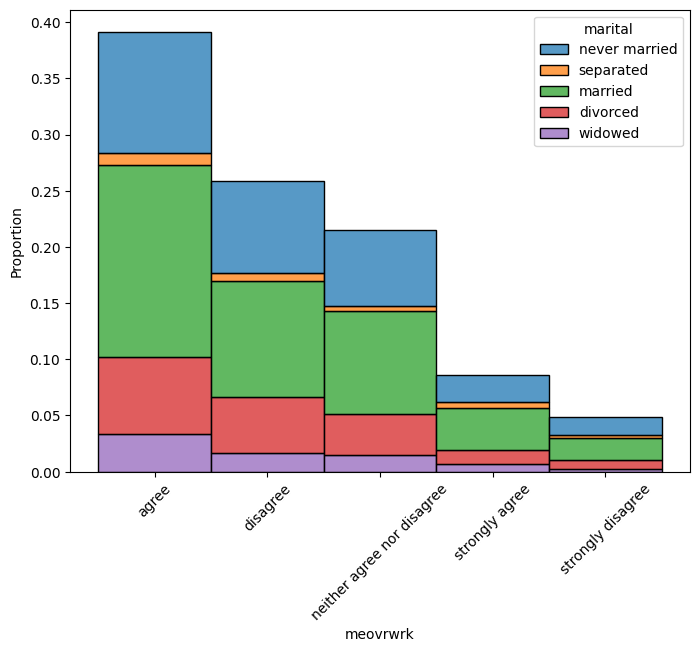

In [30]:
## create grouped histplot
plt.figure(figsize=(8,6))
sns.histplot(data=df,x=df['meovrwrk'],hue=df['marital'],stat='proportion',multiple='stack')
plt.xticks(rotation=45)
plt.show()

#### for 2018 only

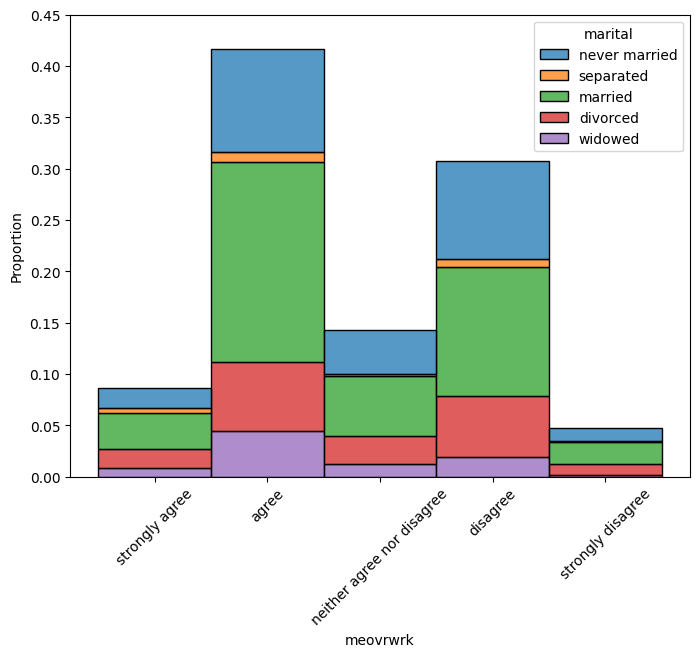

In [39]:
plt.figure(figsize=(8,6))
horder = ['never married','separated','married','divorced','widowed']
# convert meovrwrk to ordered categorical
df2018['meovrwrk'] = pd.Categorical(df2018['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
sns.histplot(data=df2018,x=df2018['meovrwrk'],hue=df2018['marital'],stat='proportion',multiple='stack',hue_order=horder)
plt.ylim([0, 0.45])
plt.xticks(rotation=45)
plt.show()

#### for 2022 only

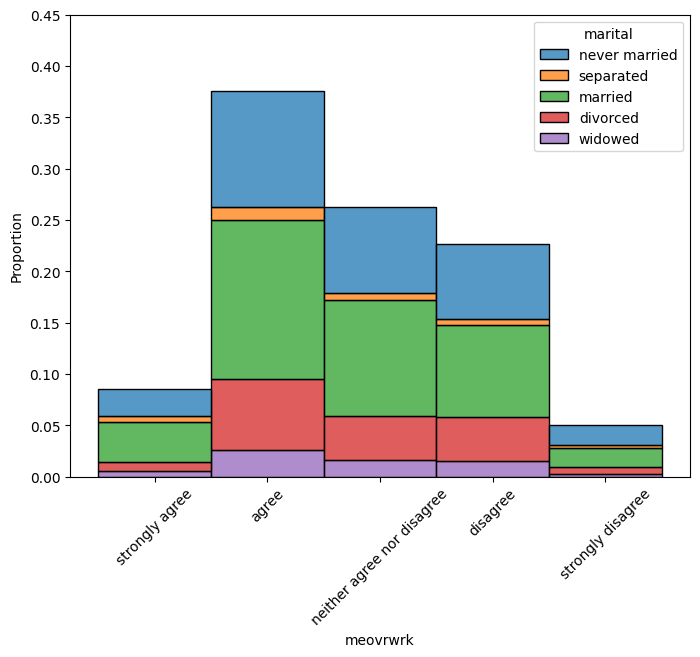

In [40]:
plt.figure(figsize=(8,6))
df2022['meovrwrk'] = pd.Categorical(df2022['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
sns.histplot(data=df2022,x=df2022['meovrwrk'],hue=df2022['marital'],stat='proportion',multiple='stack',hue_order=horder)
plt.xticks(rotation=45)
plt.ylim([0, 0.45])
plt.show()